# Download the data
## Download power lines

,,geometry,@changesetId,@lastEdit,@osmType,@version,cables,frequency,from,name,power,...,note_2,circuit:diff:names,circuit:est_names,source:cables,wikipedia,circuit:layer,note:de,circuit:endpoint:busbar,source:ref,construction
@osmId,@snapshotTimestamp,,,,,,,,,,,,,,,,,,,,,
relation/3883861,2024-03-19 14:00:00,GEOMETRYCOLLECTION (POLYGON ((9.88442 48.30252...,131248587,2023-01-13T23:23:19Z,relation,6,3,50,Dellmensingen,Delmensingen - Rotensohl,line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/1000343502,2024-03-19 14:00:00,"LINESTRING (8.81531 48.37872, 8.81114 48.37861...",139299744,2023-08-01T13:05:27Z,way,2,12,50,NaN,NaN,line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/1000343503,2024-03-19 14:00:00,"LINESTRING (8.80334 48.37848, 8.79739 48.37626...",143354035,2023-10-30T09:24:09Z,way,2,12,NaN,NaN,NaN,line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
way/100053588,2024-03-19 14:00:00,"LINESTRING (8.20862 48.11473, 8.20771 48.11510...",137650969,2023-06-22T14:46:52Z,way,13,6,NaN,NaN,NaN,line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/100551356,2024-03-19 14:00:00,"LINESTRING (9.07576 48.11526, 9.07732 48.11282...",138415167,2023-07-12T09:57:37Z,way,14,6,NaN,NaN,Anlage 1852,line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
way/993243194,2024-03-19 14:00:00,"LINESTRING (8.44141 49.25012, 8.44136 49.25016)",112575255,2021-10-16T11:36:50Z,way,1,3,50,NaN,NaN,line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/993243195,2024-03-19 14:00:00,"LINESTRING (8.44086 49.25054, 8.44090 49.25049)",112575255,2021-10-16T11:36:50Z,way,1,3,50,NaN,NaN,line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/993243196,2024-03-19 14:00:00,"LINESTRING (8.44075 49.24984, 8.44070 49.24989)",112575255,2021-10-16T11:36:50Z,way,1,3,50,NaN,NaN,line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


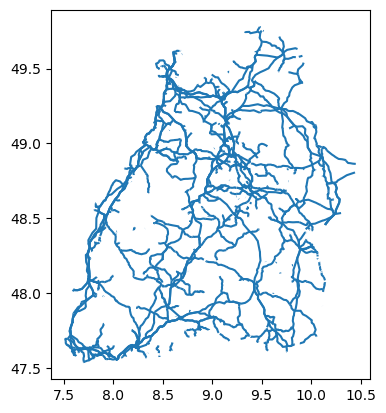

In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, box, GeometryCollection
from ohsome import OhsomeClient
import matplotlib.pyplot as plt

client = OhsomeClient()

# Load the geojson file with geopandas
bpolys = gpd.read_file("../data/input/baden_wuerttemberg.geojson")

# Define which OSM features should be considered for power lines.
filter_power_lines = "power=line"

# Specify the geometry type you want to retrieve (LineString for power lines)
geometry_type_power_lines = "LineString"

# Make the request to ohsome API for power lines
response_power_lines = client.elements.geometry.post(
    bpolys=bpolys,
    filter=filter_power_lines,
    properties="tags,metadata"
)

# Convert the response to a GeoDataFrame for power lines
power_lines_df = response_power_lines.as_dataframe()

# Display and plot the power lines GeoDataFrame
display(power_lines_df)
ax = power_lines_df.plot()

# Save the plot to a file using fig.savefig()
fig = ax.get_figure()
fig.savefig("../plots/powerlines.png", dpi=300, bbox_inches="tight")

# Save the power lines GeoDataFrame to a GeoJSON file
power_lines_df.to_file("../data/output/powerlines.geojson", driver='GeoJSON')

## Download power plants

/Users/celinathome/anaconda3/lib/python3.11/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


,,geometry,@changesetId,@lastEdit,@osmType,@version,name,operator,operator:wikidata,plant:method,plant:output:electricity,...,surface,ref:EEG,fence_type,building:min_level,plant:output:gas,source:plant:output:electricity,check_date,addr:hamlet,addr:housename,plant:source:gas
@osmId,@snapshotTimestamp,,,,,,,,,,,,,,,,,,,,,
node/10235706898,2024-03-19 14:00:00,"POLYGON ((438836.003 5294411.567, 438836.003 5...",129680029,2022-12-03T15:15:31Z,node,1,Wasserkraftwerk - Schaukraftwerk,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/11432020075,2024-03-19 14:00:00,"POLYGON ((474392.225 5472712.028, 474392.225 5...",145288627,2023-12-19T12:03:55Z,node,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/11523712555,2024-03-19 14:00:00,"POLYGON ((513760.493 5409174.400, 513760.493 5...",146341698,2024-01-16T23:00:00Z,node,1,NaN,NaN,NaN,photovoltaic,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/6481111957,2024-03-19 14:00:00,"POLYGON ((407814.833 5277842.681, 407814.833 5...",70366736,2019-05-17T17:13:28Z,node,3,Wasserkraftwerk Maulburg II,Energiedienst,NaN,run-of-the-river,190 kW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/9481774146,2024-03-19 14:00:00,"POLYGON ((595477.163 5428736.206, 595477.163 5...",143820221,2023-11-09T12:26:58Z,node,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
way/985575075,2024-03-19 14:00:00,"POLYGON ((525732.633 5383089.773, 525751.882 5...",126328232,2022-09-18T12:03:53Z,way,2,NaN,NaN,NaN,photovoltaic,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/986674594,2024-03-19 14:00:00,"POLYGON ((483734.089 5296879.451, 483784.009 5...",111649112,2021-09-24T13:50:42Z,way,1,NaN,NaN,NaN,photovoltaic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/989243544,2024-03-19 14:00:00,"POLYGON ((439145.397 5297231.243, 439167.042 5...",127375345,2022-10-11T18:44:58Z,way,2,NaN,NaN,NaN,thermal,NaN,...,NaN,NaN,metal,NaN,NaN,NaN,NaN,NaN,NaN,NaN


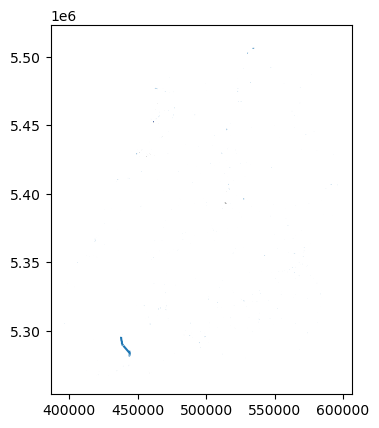

In [11]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, box, GeometryCollection
from ohsome import OhsomeClient
import matplotlib.pyplot as plt

client = OhsomeClient()

# Load the geojson file with geopandas
bpolys = gpd.read_file("../data/input/baden_wuerttemberg.geojson")

# Define which OSM features should be considered for power plants.
filter_power_plant = "power=plant"

# Make the request to ohsome API for power plants
response_power_plant = client.elements.geometry.post(
    bpolys=bpolys,
    filter=filter_power_plant,
    properties="tags,metadata"
)

# Convert the response to a GeoDataFrame for power plants
power_plant_df = response_power_plant.as_dataframe()

# Reproject to EPSG 25832 (ETRS89 / UTM Zone 32N)
bpolys = bpolys.to_crs(epsg=25832)
power_plant_df = power_plant_df.to_crs(epsg=25832)

# Some Features (very less) are points but most of them are polygons. 
# So we buffer the points to faciliate further calculations.
# Define a function to create squares around each point or within a GeometryCollection
def create_square_around_geometry(geometry, side_length):
    if isinstance(geometry, Point):
        x, y = geometry.x, geometry.y
        half_side = side_length / 2
        return box(x - half_side, y - half_side, x + half_side, y + half_side)
    elif isinstance(geometry, GeometryCollection):
        return GeometryCollection([create_square_around_geometry(sub_geometry, side_length) for sub_geometry in geometry.geoms])
    else:
        return geometry  # For other geometry types, return as is

# Set the side length for the squares (adjust as needed)
square_side_length = 5

# Create squares around each point in the GeoDataFrame
power_plant_df['geometry'] = power_plant_df['geometry'].apply(
    lambda geometry: create_square_around_geometry(geometry, square_side_length)
)

# Display and plot the power plants GeoDataFrame with square polygons
display(power_plant_df)
ax = power_plant_df.plot()

# Reproject to EPSG 4326
bpolys = bpolys.to_crs(epsg=4326)
power_plant_df = power_plant_df.to_crs(epsg=4326)

# Save the plot to a file using fig.savefig()
fig = ax.get_figure()
fig.savefig("../plots/power_plants.png", dpi=300, bbox_inches="tight")

# Save the power plants GeoDataFrame with square polygons to a GeoJSON file
power_plant_df.to_file("../data/output/powerplants.geojson", driver='GeoJSON')

## Download telecom data

,,geometry,@changesetId,@lastEdit,@osmType,@version,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street,...,level,university,addr:county,addr:district,addr:province,man_made_1,addr:housename,start_date:note,check_date,contact:country
@osmId,@snapshotTimestamp,,,,,,,,,,,,,,,,,,,,,
node/10008693564,2024-03-19 14:00:00,POINT (421834.037 5370239.751),125938407,2022-09-08T11:19:49Z,node,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/10008693565,2024-03-19 14:00:00,POINT (416994.906 5355946.141),142464306,2023-10-12T07:12:43Z,node,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/10100762567,2024-03-19 14:00:00,POINT (416682.309 5355598.696),142464269,2023-10-12T07:11:26Z,node,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/10219646042,2024-03-19 14:00:00,POINT (507749.741 5454241.607),129401565,2022-11-26T13:06:51Z,node,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/10219705344,2024-03-19 14:00:00,POINT (508094.228 5454713.786),129402241,2022-11-26T13:27:27Z,node,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
way/93578396,2024-03-19 14:00:00,POINT (401701.081 5276759.211),66065083,2019-01-06T09:19:27Z,way,2,Lörrach,NaN,30,79541,Steinsack,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/95171586,2024-03-19 14:00:00,POINT (535515.116 5464016.996),68231622,2019-03-17T15:49:18Z,way,4,Schöntal,NaN,5,74214,Grüner Weg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/95847150,2024-03-19 14:00:00,POINT (477021.828 5390197.855),135349489,2023-04-25T15:38:43Z,way,3,Neubulach,NaN,9,75387,Sperberweg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


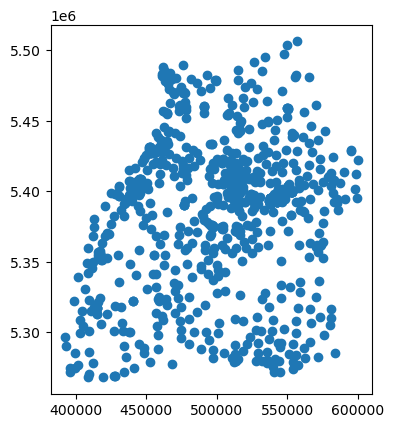

In [12]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, box, GeometryCollection
from ohsome import OhsomeClient
import matplotlib.pyplot as plt

client = OhsomeClient()

# Load the geojson file with geopandas
bpolys = gpd.read_file("../data/input/baden_wuerttemberg.geojson")

# Define which OSM features should be considered for telecom
filter_telecom = "telecom=*"

# Make the request to ohsome API for telecom
response_telecom = client.elements.geometry.post(
    bpolys=bpolys,
    filter=filter_telecom,
    properties="tags,metadata"
)

# Convert the response to a GeoDataFrame for telecom
telecom_df = response_telecom.as_dataframe()

# Reproject to EPSG 25832 (ETRS89 / UTM Zone 32N)
bpolys = bpolys.to_crs(epsg=25832)
telecom_df = telecom_df.to_crs(epsg=25832)

# If you have Polygon geometries and you want to get the centroids, use the following:
telecom_df['geometry'] = telecom_df['geometry'].centroid

# Filter to include only Point geometries
telecom_points_df = telecom_df[telecom_df['geometry'].geom_type == 'Point']

# Display and plot the telecom points GeoDataFrame
display(telecom_points_df)
ax = telecom_points_df.plot()

# Reproject to EPSG 4326
bpolys = bpolys.to_crs(epsg=4326)
telecom_points_df = telecom_points_df.to_crs(epsg=4326)

# Save the plot to a file using fig.savefig()
fig = ax.get_figure()
fig.savefig("../plots/telecom_points.png", dpi=300, bbox_inches="tight")

# Save the telecom points GeoDataFrame to a GeoJSON file
telecom_points_df.to_file("../data/output/telecom_points.geojson", driver='GeoJSON')

## Download water

,,geometry,@changesetId,@lastEdit,@osmType,@version,intermittent,name,natural,salt,water,...,swimming_pool,hazard:de,blind,playground:theme,date,denotation,fence,end_date,note:geometry,supervised
@osmId,@snapshotTimestamp,,,,,,,,,,,,,,,,,,,,,
node/10083343529,2024-03-19 14:00:00,POINT (9.24313 48.78569),127190685,2022-10-08T09:33:32Z,node,1,NaN,NaN,NaN,NaN,main,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/11015645409,2024-03-19 14:00:00,POINT (8.68713 48.15156),137950925,2023-06-30T09:50:47Z,node,1,NaN,NaN,NaN,NaN,pond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/11035825400,2024-03-19 14:00:00,POINT (7.64224 47.88087),138304303,2023-07-09T17:05:08Z,node,1,NaN,LWB,water,NaN,reservoir,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/1113685994,2024-03-19 14:00:00,POINT (9.33843 48.43883),12079993,2012-07-01T19:14:21Z,node,3,NaN,Erndtbrunnen,spring,NaN,source,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node/11346665007,2024-03-19 14:00:00,POINT (9.80222 48.85180),143976579,2023-11-13T15:53:08Z,node,1,NaN,Hummelsgraben,water,NaN,ditch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
way/999972880,2024-03-19 14:00:00,"POLYGON ((8.67539 49.35181, 8.67562 49.35182, ...",113452618,2021-11-06T16:11:51Z,way,1,yes,NaN,water,NaN,basin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/999982237,2024-03-19 14:00:00,"POLYGON ((9.02466 48.42226, 9.02445 48.42205, ...",113453905,2021-11-06T16:42:16Z,way,1,yes,NaN,water,NaN,basin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/999989477,2024-03-19 14:00:00,"POLYGON ((10.40789 48.91153, 10.40788 48.91158...",113455548,2021-11-06T17:22:20Z,way,1,NaN,NaN,water,NaN,pond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


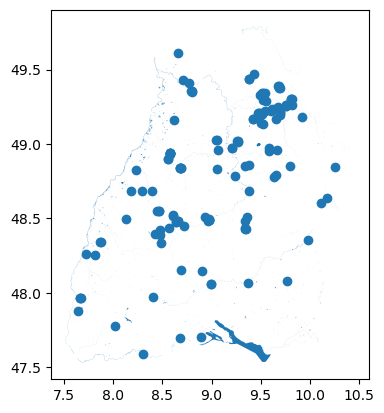

In [14]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, box, GeometryCollection
from ohsome import OhsomeClient

client = OhsomeClient()

# Load the geojson file with geopandas
bpolys = gpd.read_file("../data/input/baden_wuerttemberg.geojson")

# Define which OSM features should be considered for water
filter_water = "water=*"

# Make the request to ohsome API for water
response_water = client.elements.geometry.post(
    bpolys=bpolys,
    filter=filter_water,
    properties="tags,metadata"
)

# Convert the response to a GeoDataFrame for water
water_df = response_water.as_dataframe()

# Display and plot water GeoDataFrame
display(water_df)
ax = water_df.plot()

# Save the plot to a file using fig.savefig()
fig = ax.get_figure()
fig.savefig("../plots/water.png", dpi=300, bbox_inches="tight")

# Save the water GeoDataFrame to a GeoJSON file
water_df.to_file("../data/output/water.geojson", driver='GeoJSON')

## Download settlements

### Download all admin levels

,,geometry,@changesetId,@lastEdit,@osmType,@version,admin_level,boundary,source,name,office,...,old_name:ru,alt_name:mk,coat_of_arms,is_in:country_code,alt_name:gsw,capital_city,country_code_fips,official_name:la,official_name:rm,old_name:cs
@osmId,@snapshotTimestamp,,,,,,,,,,,,,,,,,,,,,
relation/10180634,2024-03-19 14:00:00,"POLYGON ((7.82338 48.61184, 7.82503 48.61371, ...",75956892,2019-10-20T15:15:04Z,relation,1,9,administrative,NaN,Auenheim,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relation/10180638,2024-03-19 14:00:00,"POLYGON ((7.83202 48.62274, 7.83303 48.62488, ...",100610678,2021-03-08T06:41:06Z,relation,2,9,administrative,NaN,Leutesheim,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relation/10253405,2024-03-19 14:00:00,"POLYGON ((8.26149 48.98099, 8.26149 48.98099, ...",76549652,2019-11-03T12:19:19Z,relation,1,10,administrative,NaN,Neuburgweier,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relation/10253406,2024-03-19 14:00:00,"POLYGON ((8.35451 48.93455, 8.35403 48.93470, ...",107229556,2021-06-30T21:35:41Z,relation,2,10,administrative,NaN,Mörsch,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relation/10253407,2024-03-19 14:00:00,"POLYGON ((8.33201 48.98873, 8.33269 48.98836, ...",107229556,2021-06-30T21:35:38Z,relation,2,10,administrative,NaN,Forchheim,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
way/737048810,2024-03-19 14:00:00,"POLYGON ((7.87524 48.60612, 7.87718 48.60924, ...",75956892,2019-10-20T15:15:04Z,way,1,9,administrative,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/73845577,2024-03-19 14:00:00,"POLYGON ((8.19234 48.74580, 8.19330 48.74492, ...",17544110,2013-08-27T20:27:16Z,way,3,6,administrative,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/82672837,2024-03-19 14:00:00,"POLYGON ((8.93736 47.89451, 8.93755 47.89456, ...",61534788,2018-08-10T12:28:46Z,way,3,8,administrative,http://de.wikipedia.org/wiki/Datei:Municipalit...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


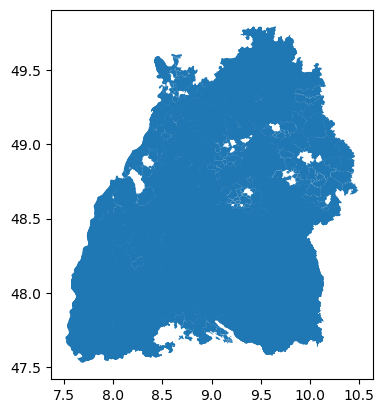

In [17]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, box, GeometryCollection
from ohsome import OhsomeClient

client = OhsomeClient()

# Load the geojson file with geopandas
bpolys = gpd.read_file("../data/input/baden_wuerttemberg.geojson")

# Define which OSM features should be considered for administrative boundaries
filter_admin = "admin_level=*"

# Make the request to ohsome API for administrative boundaries
response_admin = client.elements.geometry.post(
    bpolys=bpolys,
    filter=filter_admin,
    properties="tags,metadata"
)

# Convert the response to a GeoDataFrame for administrative boundaries
admin_df = response_admin.as_dataframe()

# Ensure that the 'geometry' column contains polygon geometries
admin_df = admin_df[admin_df['geometry'].geom_type == 'Polygon']

# Display and plot administrative boundaries GeoDataFrame
display(admin_df)
admin_df.plot()

# Save the administrative boundaries GeoDataFrame to a GeoJSON file
admin_df.to_file("../data/output/administrative_boundaries_all.geojson", driver='GeoJSON')

## Download nature reserves

,,geometry,@changesetId,@lastEdit,@osmType,@version,leisure,name,natural_protection,wikidata,leaf_type,...,camping,dtp_id,horse,motor_vehicle,openfire,addr:city,abandoned:landuse,survey:date,noname,protection_aim
@osmId,@snapshotTimestamp,,,,,,,,,,,,,,,,,,,,,
relation/11199841,2024-03-19 14:00:00,"POLYGON ((9.76263 47.83266, 9.76318 47.83266, ...",86597507,2020-06-13T11:52:30Z,relation,1,nature_reserve,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relation/11292623,2024-03-19 14:00:00,"POLYGON ((8.93973 49.30538, 8.94003 49.30532, ...",87852793,2020-07-11T13:46:24Z,relation,1,nature_reserve,Waibstädter Schwarzbachaue,NaN,Q62026808,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relation/11294696,2024-03-19 14:00:00,"POLYGON ((8.78790 49.38151, 8.78833 49.38203, ...",87871702,2020-07-12T10:00:39Z,relation,1,nature_reserve,Elsenzaue-Hollmuthang,NaN,Q62026875,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relation/11304365,2024-03-19 14:00:00,"POLYGON ((8.61350 49.13005, 8.61438 49.13016, ...",87994236,2020-07-14T20:25:15Z,relation,1,nature_reserve,Rotenberg,NaN,Q62026890,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relation/11316227,2024-03-19 14:00:00,"POLYGON ((8.48720 48.84637, 8.48778 48.84651, ...",88203914,2020-07-19T15:35:32Z,relation,2,nature_reserve,Pfinzquellen,NaN,Q57814657,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
way/972037681,2024-03-19 14:00:00,"POLYGON ((7.63015 48.07343, 7.63200 48.07243, ...",137532582,2023-06-19T19:26:45Z,way,2,nature_reserve,Schneckenberg,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/972042527,2024-03-19 14:00:00,"POLYGON ((7.64246 48.07347, 7.64230 48.07342, ...",137532582,2023-06-19T19:26:45Z,way,3,nature_reserve,Bitzenberg,NaN,Q62026943,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/972048896,2024-03-19 14:00:00,"POLYGON ((7.77759 48.23348, 7.77764 48.23355, ...",137532582,2023-06-19T19:26:45Z,way,3,nature_reserve,Steinbruch Ehrleshalden,NaN,Q15130332,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


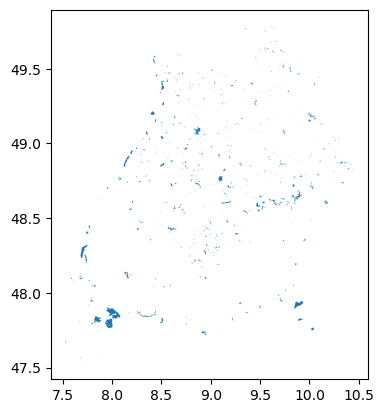

In [36]:
import pandas as pd
import geopandas as gpd
from ohsome import OhsomeClient

client = OhsomeClient()

# Load the geojson file with geopandas
bpolys = gpd.read_file("../data/input/baden_wuerttemberg.geojson")

# Define which OSM features should be considered for nature reserves.
filter_nature_reserve = "leisure=nature_reserve"

# Make the request to ohsome API for nature reserve
response_nature_reserve = client.elements.geometry.post(
    bpolys=bpolys,
    filter=filter_nature_reserve,
    properties="tags,metadata"
)

# Filter the response to include only polygons
nature_reserve_df = response_nature_reserve.as_dataframe()
nature_reserve_df = nature_reserve_df[nature_reserve_df.geometry.type == 'Polygon']

# Display and plot the nature reserves GeoDataFrame
display(nature_reserve_df)
nature_reserve_df.plot()

# Save the nature reserves GeoDataFrame to a GeoJSON file
nature_reserve_df.to_file("../data/output/nature_reserve.geojson", driver='GeoJSON')


## Download protected areas

,,geometry,@changesetId,@lastEdit,@osmType,@version,boundary,leisure,name,protect_class,protection_title,...,religion,lad:criteria,protection_aim,fence_type,trees,man_made,openfire,comment,bicycle,protected_area
@osmId,@snapshotTimestamp,,,,,,,,,,,,,,,,,,,,,
relation/10116799,2024-03-19 14:00:00,"MULTIPOLYGON (((7.99000 48.73688, 7.99026 48.7...",137532582,2023-06-19T19:26:45Z,relation,4,protected_area,nature_reserve,Lichtenauer Rheinniederung,4,Naturschutzgebiet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relation/10168615,2024-03-19 14:00:00,"MULTIPOLYGON (((8.42287 48.70140, 8.42238 48.7...",137532582,2023-06-19T19:26:45Z,relation,8,protected_area,nature_reserve,Kaltenbronn,4,Naturschutzgebiet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relation/10830286,2024-03-19 14:00:00,"MULTIPOLYGON (((9.34398 47.73197, 9.34394 47.7...",89415220,2020-08-14T13:56:40Z,relation,4,protected_area,NaN,NaN,22,Gesamtanlage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relation/11267834,2024-03-19 14:00:00,"MULTIPOLYGON (((9.28212 48.79181, 9.28279 48.7...",141343189,2023-09-16T13:35:08Z,relation,8,protected_area,NaN,Schurwald,97,Fauna-Flora-Habitat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relation/11283442,2024-03-19 14:00:00,"MULTIPOLYGON (((8.61294 48.92813, 8.61393 48.9...",88263808,2020-07-20T20:19:23Z,relation,3,protected_area,nature_reserve,Ersinger Springenhalde,4,Naturschutzgebiet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
way/9955306,2024-03-19 14:00:00,"POLYGON ((8.53546 49.31616, 8.53519 49.31620, ...",103973058,2021-05-01T20:26:36Z,way,11,protected_area,NaN,Kleingartenanlage Benswiesen / Mörsch,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/99578434,2024-03-19 14:00:00,"POLYGON ((8.08253 48.70506, 8.08467 48.70452, ...",141360810,2023-09-16T22:34:25Z,way,3,protected_area,NaN,Gruppenwasserversorgung Balzhofen 16,12,Wasserschutzgebiet-Schutzzone I,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
way/99578437,2024-03-19 14:00:00,"POLYGON ((8.07965 48.70440, 8.08061 48.70365, ...",141360810,2023-09-16T22:34:25Z,way,5,protected_area,NaN,Gruppenwasserversorgung Balzhofen 16,12,Wasserschutzgebiet-Schutzzone II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


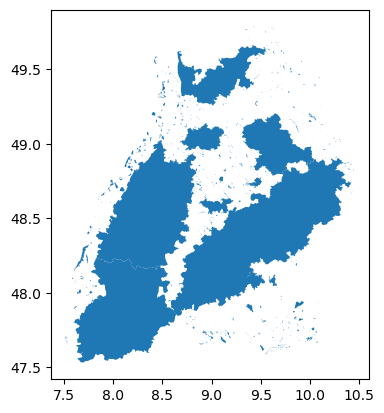

In [37]:
import pandas as pd
import geopandas as gpd
from ohsome import OhsomeClient

client = OhsomeClient()

# Load the GeoJSON file with geopandas
bpolys = gpd.read_file("../data/input/baden_wuerttemberg.geojson")

# Define which OSM features should be considered for protected areas
filter_protected_area = "boundary=protected_area"

# Make the request to ohsome API for nature reserve
response_protected_area = client.elements.geometry.post(
    bpolys=bpolys,
    filter=filter_protected_area,
    properties="tags,metadata"
)

# Convert the response to a GeoDataFrame for protected areas
protected_area_df = response_protected_area.as_dataframe()

# Filter the GeoDataFrame to include only polygons and multi-polygons
filtered_protected_area_df = protected_area_df[protected_area_df.geom_type.isin(['Polygon', 'MultiPolygon'])]

# Display the filtered protected area GeoDataFrame
display(filtered_protected_area_df)

# Plot the protected area GeoDataFrame
filtered_protected_area_df.plot()

# Save the filtered protected areas GeoDataFrame to a GeoJSON file
filtered_protected_area_df.to_file("../data/output/protected_area.geojson", driver='GeoJSON')


# Grid

# Centroids

# Data processing

## Cleaning the data

### the column headers have a ":" in the name which creates troubles for further analysis

In [73]:
import geopandas as gpd

# Load power plants GeoJSON file
power_plants = gpd.read_file("../data/output/powerplants.geojson")

# Replace the colon (:) with an underscore (_) in the column name
power_plants.columns = power_plants.columns.str.replace(':', '_')

# Save the modified GeoDataFrame to a new GeoJSON file
power_plants.to_file("../data/output/powerplants_name.geojson", driver='GeoJSON')

# Load the modified GeoDataFrame from the new file
power_plants_modified = gpd.read_file("../data/output/powerplants_name.geojson")

# Print all column names for the new file
print("\nModified Column Names:")
for col in power_plants_modified.columns:
    print(col)


Modified Column Names:
@osmId
@snapshotTimestamp
@changesetId
@lastEdit
@osmType
@version
name
operator
operator_wikidata
plant_method
plant_output_electricity
plant_source
power
start_date
type
description
plant_output_hot_water
website
site
generator_method
generator_output_electricity
generator_source
generator_type
barrier
wikidata
wikimedia_commons
building
layer
plant_type
landuse
opening_date
wikipedia
construction_start_date
note
source
old_operator
frequency
voltage
addr_city
addr_country
addr_housenumber
addr_postcode
addr_street
manufacturer
location
addr_place
alt_name
ref_bna
addr_suburb
plant_output_heat
ref_EU_ENTSOE_EIC
contact_website
short_name
construction_plant_method
construction_plant_output_electricity
construction_plant_source
construction_plant_storage
fixme
planned_plant_storage
plant_storage
heritage
heritage_operator
historic
ruins
building_material
building_name
height
plant_output_cold_water
waterway
old_name
plant_output_steam
source_geometry
usage
acces

## Calculating the area for the water polygons

In [95]:
import geopandas as gpd

# Load water GeoJSON file
water_gdf = gpd.read_file("../data/output/water.geojson")

# Filter out geometries that are polygons and create a copy
water_polygons = water_gdf[water_gdf['geometry'].geom_type == 'Polygon'].copy()

# Replace the colon (:) with an underscore (_) in the column names
water_polygons.columns = water_polygons.columns.str.replace(':', '_')

# Reproject the geometries to EPSG:25832
water_polygons = water_polygons.to_crs(epsg=25832)

# Calculate the area for each polygon and store it in a new column
water_polygons['area'] = water_polygons['geometry'].area

# Save the GeoDataFrame with polygons and the calculated area to a new GeoJSON file
water_polygons.to_file("../data/output/water_area.geojson", driver='GeoJSON')


## Distance centroids to factors

### add distance to nearest telecom point to centroids

In [84]:
import geopandas as gpd
from shapely.ops import nearest_points

# Load centroids and telecom points data with GeoPandas
centroids = gpd.read_file('../data/output/centroids_with_coordinates.geojson')
telecom_points = gpd.read_file('../data/output/telecom_points.geojson')

# Reproject to EPSG:25832
centroids = centroids.to_crs(epsg=25832)
telecom_points = telecom_points.to_crs(epsg=25832)

# Calculate distance between each centroid and the nearest telecom point
distances = []
nearest_telecom = []

for idx, centroid in centroids.iterrows():
    nearest_point = nearest_points(centroid.geometry, telecom_points.unary_union)[1]
    distance = centroid.geometry.distance(nearest_point)
    distances.append(distance)
    nearest_telecom.append(telecom_points.iloc[telecom_points.distance(nearest_point).idxmin()]['telecom'])

# Add the distances and nearest telecom information to the centroids dataframe
centroids['distance_to_telecom'] = distances
centroids['nearest_telecom'] = nearest_telecom

# Create a new GeoDataFrame with distance and telecom information
telecom_distance = centroids[['id', 'geometry', 'longitude', 'latitude', 'distance_to_telecom', 'nearest_telecom']]

# Save the GeoDataFrame to GeoJSON
telecom_distance.to_file('../data/output/telecom_distance.geojson', driver='GeoJSON')


### add distance to nearest power plant

In [85]:
import geopandas as gpd
import pandas as pd
from shapely.ops import nearest_points

# Load centroids and power plants data with GeoPandas
centroids = gpd.read_file('../data/output/telecom_distance.geojson')
powerplants = gpd.read_file('../data/output/powerplants_name.geojson')

# Reproject both datasets to a projected CRS (e.g., EPSG:25832)
centroids = centroids.to_crs(epsg=25832)
powerplants = powerplants.to_crs(epsg=25832)

# Calculate centroids of power plant polygons
powerplant_centroids = powerplants.copy()
powerplant_centroids['geometry'] = powerplant_centroids['geometry'].centroid

# Calculate distance between each centroid and the nearest power plant
distances = []
for idx, centroid in centroids.iterrows():
    nearest_point = nearest_points(centroid.geometry, powerplant_centroids.unary_union)[1]
    distance = centroid.geometry.distance(nearest_point)
    distances.append(distance)

# Add the distances to the centroids dataframe
centroids['distance_to_powerplant'] = distances

# Merge power plant information into centroids dataframe based on the nearest plant
nearest_plant_info = []
for idx, centroid in centroids.iterrows():
    nearest_plant = powerplant_centroids.iloc[powerplant_centroids.distance(centroid.geometry).idxmin()]
    nearest_plant_info.append(nearest_plant[['plant_method', 'plant_source', 'name']])

nearest_plant_info_df = pd.DataFrame(nearest_plant_info, columns=['plant_method', 'plant_source', 'name'])
centroids.reset_index(drop=True, inplace=True)  # Reset index to avoid non-unique index values
nearest_plant_info_df.reset_index(drop=True, inplace=True)  # Reset index to avoid non-unique index values
centroids_with_info = pd.concat([centroids, nearest_plant_info_df], axis=1)

# Save the GeoDataFrame to GeoJSON
centroids_with_info.to_file('../data/output/powerplant_distance.geojson', driver='GeoJSON')


### add distance to powerlines

In [88]:
import geopandas as gpd
from shapely.ops import nearest_points

# Load centroids and power lines data with GeoPandas
centroids = gpd.read_file('../data/output/powerplant_distance.geojson')
powerlines = gpd.read_file('../data/output/powerlines.geojson')

# Reproject to EPSG:25832
centroids = centroids.to_crs(epsg=25832)
powerlines = powerlines.to_crs(epsg=25832)

# Calculate distance between each centroid and the nearest power line
distances = []

for idx, centroid in centroids.iterrows():
    nearest_line = powerlines.geometry.distance(centroid.geometry).idxmin()
    nearest_point_on_line = nearest_points(centroid.geometry, powerlines.loc[nearest_line].geometry)[0]
    distance = centroid.geometry.distance(nearest_point_on_line)
    distances.append(distance)

# Add the distances to the centroids dataframe
centroids['distance_to_powerline'] = distances

# Merge with powerlines data to get additional columns
merged_data = centroids.merge(powerlines[['cables', 'voltage']], how='cross')

# Save the GeoDataFrame to GeoJSON
merged_data.to_file('../data/output/powerline_distance.geojson', driver='GeoJSON')


### add distance to water

In [91]:
import geopandas as gpd
from shapely.ops import nearest_points

# Load centroids and water areas data with GeoPandas
centroids = gpd.read_file('../data/output/powerline_distance.geojson')
water_areas = gpd.read_file('../data/output/water_area.geojson')

# Reproject to EPSG:25832
centroids = centroids.to_crs(epsg=25832)
water_areas = water_areas.to_crs(epsg=25832)

# Calculate distance between each centroid and the nearest water area
distances = []

for idx, centroid in centroids.iterrows():
    nearest_feature = water_areas.geometry.distance(centroid.geometry).idxmin()
    nearest_point_on_feature = nearest_points(centroid.geometry, water_areas.loc[nearest_feature].geometry)[0]
    distance = centroid.geometry.distance(nearest_point_on_feature)
    distances.append(distance)

# Add the distances to the centroids dataframe
centroids['distance_to_water'] = distances

# Merge with water areas data to get additional columns
merged_data = centroids.copy()

for geom_type in water_areas.geometry.type.unique():
    if geom_type == 'Polygon' or geom_type == 'MultiPolygon':
        nearest_points = centroids.geometry.apply(lambda x: nearest_points(x, water_areas[water_areas.geometry.type == geom_type].unary_union)[0])
    else:
        nearest_points = centroids.geometry.apply(lambda x: nearest_points(x, water_areas[water_areas.geometry.type == geom_type])[0])
    centroids[f'nearest_{geom_type.lower()}_distance'] = centroids.geometry.distance(nearest_points)

# Merge with original powerline_distance data to get additional columns
merged_data = merged_data.merge(centroids[['id', 'distance_to_water']], on='id', suffixes=('', '_water'))
merged_data = merged_data.merge(water_areas[['area', 'water']], on='id', suffixes=('', '_water'))

# Save the GeoDataFrame to GeoJSON
merged_data.to_file('../data/output/water_distance.geojson', driver='GeoJSON')


2024-03-28 14:20:04,537  geodataframe  WARNING:  Several features with id = 1 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer


KeyboardInterrupt: 

In [92]:
import geopandas as gpd
from shapely.ops import nearest_points

# Load centroids and water areas data with GeoPandas
centroids = gpd.read_file('../data/output/powerline_distance.geojson')
water_areas = gpd.read_file('../data/output/water_area.geojson')

# Reproject to EPSG:25832
centroids = centroids.to_crs(epsg=25832)
water_areas = water_areas.to_crs(epsg=25832)

# Calculate distance between each centroid and the nearest water area
distances = []

for idx, centroid in centroids.iterrows():
    nearest_feature = water_areas.geometry.distance(centroid.geometry).idxmin()
    nearest_point_on_feature = nearest_points(centroid.geometry, water_areas.loc[nearest_feature].geometry)[0]
    distance = centroid.geometry.distance(nearest_point_on_feature)
    distances.append(distance)

# Add the distances to the centroids dataframe
centroids['distance_to_water'] = distances

# Merge with original powerline_distance data to get additional columns
merged_data = gpd.sjoin(centroids, water_areas, how="left", op='intersects')

# Save the GeoDataFrame to GeoJSON
merged_data.to_file('../data/output/water_distance.geojson', driver='GeoJSON')


2024-03-28 14:32:30,936  geodataframe  WARNING:  Several features with id = 1 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer


KeyboardInterrupt: 

### add if in protected area or nature reserve

In [97]:
import geopandas as gpd

# Load hexagon grid and protected areas data
grid = gpd.read_file('../data/output/grid.geojson')
protected_areas = gpd.read_file('../data/output/clipped_protected_area.geojson')

# Perform spatial join to identify which hexagons intersect with protected areas
grid_with_protected_areas = gpd.sjoin(grid, protected_areas, how='left', op='intersects')

# Select necessary columns from the joined dataset
selected_columns = ['geometry', 'protect_class', 'reclass_protect_class']

# Save the result to a new GeoJSON file
grid_with_protected_areas[selected_columns].to_file('../data/output/grid_with_protected_areas.geojson', driver='GeoJSON')


In [104]:
import geopandas as gpd

# Load grid_with_protected_areas.geojson
grid_with_protected_areas = gpd.read_file('../data/output/grid_with_protected_areas.geojson')

# Load centroids_with_coordinates.geojson
centroids = gpd.read_file('../data/output/centroids_with_coordinates.geojson')

# Perform spatial join to identify centroids within hexagons
joined_data = gpd.sjoin(grid_with_protected_areas, centroids, how='left')

# Save the result to a new GeoJSON file
joined_data.to_file('../data/output/grid_with_protected_areas_with_centroid_id.geojson', driver='GeoJSON')


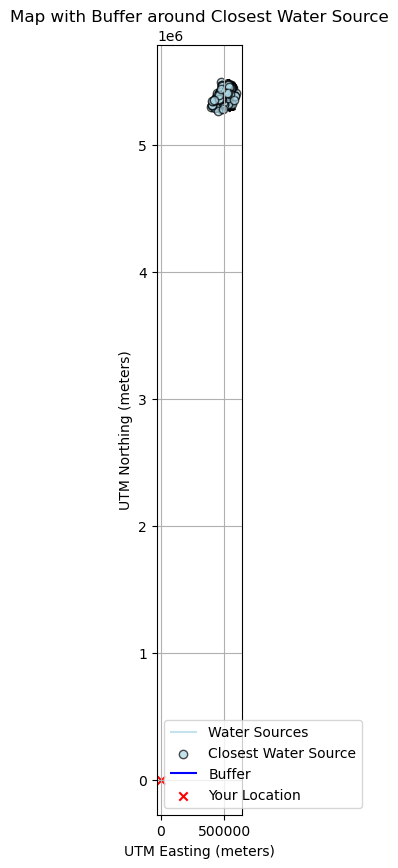

In [5]:
import geopandas as gpd
import folium
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

# Load water sources GeoJSON file
water_sources = gpd.read_file("water.geojson")

# Define a sample location (replace this with your actual location)
location = Point(9.030046, 47.884551)  # Example coordinates in Baden-Württemberg

# Reproject geometries to UTM Zone 32N (EPSG:25832)
water_sources = water_sources.to_crs("EPSG:25832")

# Calculate distance to the nearest water source for each geometry
water_sources['distance'] = water_sources.geometry.distance(location)

# Find the closest water source
closest_water_source = water_sources.loc[water_sources['distance'].idxmin()]

# Handle GeometryCollection by extracting individual geometries
if closest_water_source.geometry.geom_type == 'GeometryCollection':
    closest_water_source = closest_water_source.geometry.geoms[0]

# Get the centroid of the closest water source (for polygons and points)
if closest_water_source.geom_type == 'Polygon':
    marker_location = closest_water_source.centroid
elif closest_water_source.geom_type == 'Point':
    marker_location = closest_water_source
elif closest_water_source.geom_type == 'LineString':
    # For LineString, use the interpolate method to find a point along the line
    marker_location = Point(closest_water_source.interpolate(0.5, normalized=True))

# Define buffer distance (adjust as needed)
buffer_distance = 2  # in kilometers

# Create a GeoDataFrame with the closest water source and its buffer
closest_water_gdf = gpd.GeoDataFrame(geometry=[closest_water_source])
buffer = closest_water_source.buffer(buffer_distance * 1000)  # Buffer in meters
buffer_gdf = gpd.GeoDataFrame(geometry=[buffer])

# Plot the map with Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
water_sources.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.7)
closest_water_gdf.plot(ax=ax, color='blue')
buffer_gdf.plot(ax=ax, color='green', alpha=0.3)
plt.scatter(location.x, location.y, color='red', marker='x', label='Your Location')

# Add legend and labels
ax.legend(['Water Sources', 'Closest Water Source', 'Buffer', 'Your Location'])
plt.xlabel('UTM Easting (meters)')
plt.ylabel('UTM Northing (meters)')
plt.title('Map with Buffer around Closest Water Source')
plt.grid(True)
plt.show()


In [6]:
import geopandas as gpd
from shapely.geometry import Point, LineString

# Load water sources GeoJSON file
water_sources = gpd.read_file("water.geojson")

# Define a sample location (replace this with your actual location)
location = Point(9.030046, 47.884551)  # Example coordinates in Baden-Württemberg

# Reproject geometries to UTM Zone 32N (EPSG:25832)
water_sources = water_sources.to_crs("EPSG:25832")

# Calculate distance to the nearest water source for each geometry
water_sources['distance'] = water_sources.geometry.distance(location)

# Find the closest water source
closest_water_source = water_sources.loc[water_sources['distance'].idxmin()]

# Handle GeometryCollection by extracting individual geometries
if closest_water_source.geometry.geom_type == 'GeometryCollection':
    closest_water_source = closest_water_source.geometry.geoms[0]

# Get the centroid of the closest water source (for polygons and points)
if closest_water_source.geom_type == 'Polygon':
    marker_location = closest_water_source.centroid
elif closest_water_source.geom_type == 'Point':
    marker_location = closest_water_source
elif closest_water_source.geom_type == 'LineString':
    # For LineString, use the interpolate method to find a point along the line
    marker_location = Point(closest_water_source.interpolate(0.5, normalized=True))

# Define buffer distance (adjust as needed)
buffer_distance = 2  # in kilometers

# Create a GeoDataFrame with the closest water source and its buffer
closest_water_gdf = gpd.GeoDataFrame(geometry=[closest_water_source])
buffer = closest_water_source.buffer(buffer_distance * 1000)  # Buffer in meters
buffer_gdf = gpd.GeoDataFrame(geometry=[buffer])

# Save the GeoDataFrames as GeoJSON files
closest_water_gdf.to_file("closest_water_source.geojson", driver='GeoJSON')
buffer_gdf.to_file("buffer_around_water_source.geojson", driver='GeoJSON')


## check the protect class in protected area and reclassify

[ 0  1  4  5  7 12 14 15 22 97 98 99]


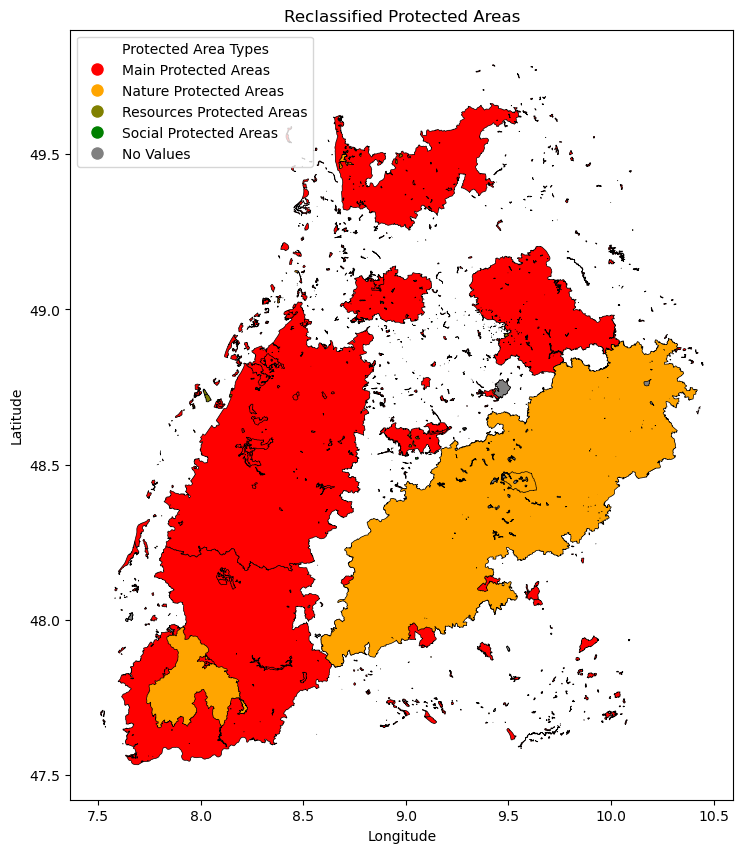

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# Read the protected_area.geojson file into a GeoDataFrame
protected_areas = gpd.read_file('../data/output/protected_area.geojson')

# Define replacements for non-numeric values
replacements = {'1a': '1', '1b': '1'}

# Replace non-numeric values in the 'protect_class' column
protected_areas['protect_class'] = protected_areas['protect_class'].replace(replacements)

# Convert the 'protect_class' column to numeric, coercing non-numeric values to NaN
protected_areas['protect_class'] = pd.to_numeric(protected_areas['protect_class'], errors='coerce')

# Fill NaN values with 0
protected_areas['protect_class'] = protected_areas['protect_class'].fillna(0).astype(int)

# Get all distinct entries in the protect_class column
distinct_protect_classes = protected_areas['protect_class'].unique()

# Sort the distinct protect classes in ascending order
distinct_protect_classes_sorted = np.sort(distinct_protect_classes)

# Print the distinct protect classes sorted in ascending order
print(distinct_protect_classes_sorted)

# Define the reclassification rules
def reclassify_protect_class(protect_class):
    if 1 <= protect_class <= 6:
        return 1
    elif protect_class in [7, 97, 98, 99]:
        return 2
    elif protect_class in [12, 14, 15, 19]:
        return 3
    elif protect_class in [21, 22, 24, 27]:
        return 4
    else:
        return 5  # For all other values

# Apply the reclassification function to the 'protect_class' column
protected_areas['reclass_protect_class'] = protected_areas['protect_class'].apply(reclassify_protect_class)

# Define custom class labels
class_labels = {
    1: 'Main Protected Areas',
    2: 'Nature Protected Areas',
    3: 'Resources Protected Areas',
    4: 'Social Protected Areas',
    5: 'No Values'
}

# Define custom colors for each class
class_colors = {
    1: 'red',
    2: 'orange',
    3: 'olive',
    4: 'green',
    5: 'gray'
}

# Plot the reclassified data with custom colors and labels
fig, ax = plt.subplots(figsize=(10, 10))
legend_handles = []
for class_value in sorted(class_labels.keys()):
    class_label = class_labels[class_value]
    class_color = class_colors[class_value]
    class_data = protected_areas[protected_areas['reclass_protect_class'] == class_value]
    class_handle = Line2D([0], [0], marker='o', color='w', markerfacecolor=class_color, label=class_label, markersize=10)
    legend_handles.append(class_handle)
    class_data.plot(ax=ax, color=class_color, edgecolor='black', linewidth=0.5)

# Add legend with custom handles
ax.legend(handles=legend_handles, loc='upper left', title='Protected Area Types')

plt.title('Reclassified Protected Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Save the plot to a file using fig.savefig()
fig.savefig("../plots/protected_area_reclass.png", dpi=300, bbox_inches="tight")

# Save the reclassified data as GeoJSON
protected_areas.to_file("../data/output/protected_area_reclass.geojson", driver='GeoJSON')

# Add Grid to Area of Interest

Number of records in grid: 175


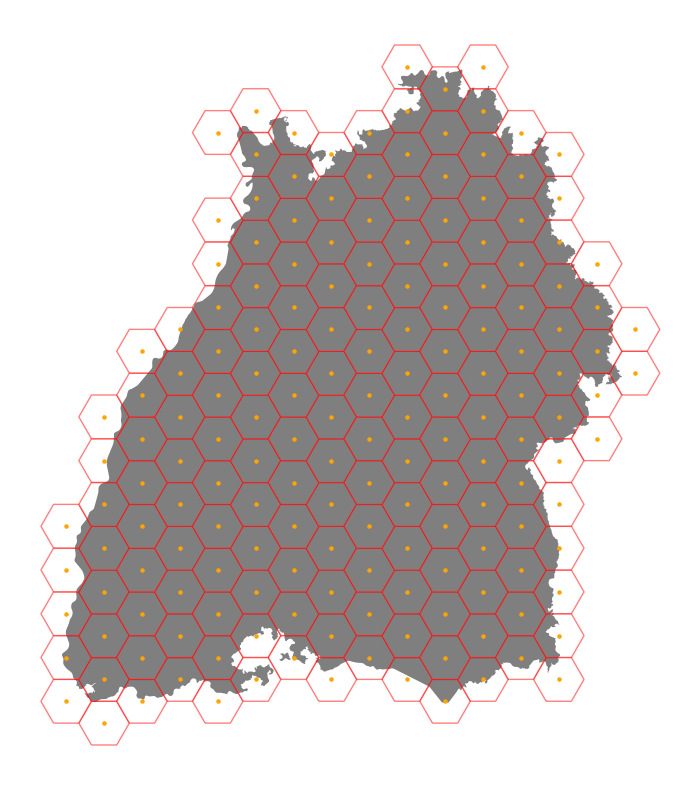

In [23]:
import geopandas as gpd
import geohexgrid as ghg
import matplotlib.pyplot as plt

# Load Baden-Württemberg territorial authorities
bw = gpd.read_file("../data/input/baden_wuerttemberg.geojson")

# Reproject to EPSG 25832 (ETRS89 / UTM Zone 32N)
bw = bw.to_crs(epsg=25832)

# Cover it minimally with hexagons of circumradius 10 kilometres
grid = ghg.make_grid_from_gdf(bw, R=10_000)

# Save the grid as GeoJSON
grid.to_file("../data/output/grid.geojson", driver="GeoJSON")

# Check data
print("Number of records in grid:", len(grid))

# Calculate centroids of hexagons
centroids = grid.geometry.centroid

# Save the centroids as GeoJSON
centroids_gdf = gpd.GeoDataFrame(geometry=centroids)
centroids_gdf.to_file("../data/output/centroids_grid.geojson", driver="GeoJSON")

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
bw.plot(ax=ax, color="black")
grid.plot(ax=ax, color="white", edgecolor="red", alpha=0.5)
centroids.plot(ax=ax, color="orange", markersize=5)

# Remove axis
ax.axis('off')

# Display the plot
plt.show()

# Save the plot to a file using fig.savefig()
fig.savefig("../plots/baden_wuerttemberg_grid_centroid.png", dpi=300, bbox_inches="tight")

## calculate coordinates for the centroids

In [26]:
import json
import pyproj
from pyproj import Proj

# Define the target CRS (WGS84, EPSG:4326) for latitude and longitude
target_crs = Proj('epsg:4326')

# Open the GeoJSON file
with open('../data/output/centroids_grid.geojson') as f:
    data = json.load(f)

# Initialize the ID counter
id_counter = 1

# Initialize the transformer for coordinate transformation
transformer = pyproj.Transformer.from_proj(Proj('epsg:25832'), target_crs)

# Iterate over features and calculate longitude and latitude
for feature in data['features']:
    # Assign an ongoing ID to each feature
    feature['properties']['id'] = id_counter
    id_counter += 1
    
    # Extract coordinates
    coordinates = feature['geometry']['coordinates']
    # Transform coordinates to longitude and latitude
    longitude, latitude = transformer.transform(coordinates[0], coordinates[1])
    # Add longitude and latitude as separate properties
    feature['properties']['longitude'] = longitude
    feature['properties']['latitude'] = latitude

# Save the modified GeoJSON data back to a new file
with open('../data/output/centroids_with_coordinates.geojson', 'w') as f:
    json.dump(data, f)

print("Longitude and latitude calculated, IDs assigned, and saved to centroids_with_coordinates.geojson.")


Longitude and latitude calculated, IDs assigned, and saved to centroids_with_coordinates.geojson.


# Calculate isochrones

## for car

In [61]:
import json
import time
import os
import geopandas as gpd
from openrouteservice import Client
from openrouteservice.exceptions import ApiError

# Load centroids data with GeoPandas
centroids = gpd.read_file('../data/output/centroids_with_coordinates.geojson')

# Change CRS to EPSG:4326
centroids = centroids.to_crs("EPSG:4326")

# Initialize OpenRouteService client
api_key = "5b3ce3597851110001cf6248a4c1622953564835b0073382a3ee7dfa"  # Replace with your actual API key
client = Client(key=api_key)

# Define parameters for isochrone calculation
profile = 'driving-car'
range_type = 'time'
range_seconds = [600, 1200, 1800, 2700, 3600]  # Define desired time ranges in seconds

# Directory to save isochrones files
output_directory = '../data/output/isochrones_car/'

# Create the directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Function to calculate isochrones with retry mechanism
def calculate_isochrones_with_retry(coordinate):
    retries = 3  # Number of retries
    for attempt in range(retries):
        try:
            isochrones = client.isochrones(locations=[coordinate], profile=profile, range_type=range_type, range=range_seconds, attributes=['total_pop'])
            return isochrones
        except ApiError as e:
            if "rate limit exceeded" in str(e):
                print(f"Rate limit exceeded. Retrying in 10 seconds...")
                time.sleep(10)  # Retry after 10 seconds for rate limit errors
            elif "Unable to build an isochrone map" in str(e):
                print(f"Unable to build an isochrone map for centroid. Skipping...")
                return None
            else:
                raise e  # Re-raise the exception if it's not related to rate limit exceeded
    return None

# Iterate over centroids and calculate isochrones
for idx, row in centroids.iterrows():
    # Get coordinates of the centroid
    lon, lat = row['geometry'].x, row['geometry'].y
    coordinate = (lon, lat)

    # Calculate isochrones with retry mechanism
    isochrones = calculate_isochrones_with_retry(coordinate)
    if isochrones is None:
        continue  # Skip the centroid if isochrones cannot be calculated

    # Save isochrones data to file
    output_filename = os.path.join(output_directory, f'isochrones_{row["id"]}.geojson')
    with open(output_filename, 'w') as output_file:
        json.dump(isochrones, output_file)

    print(f"Isochrones calculated for centroid {row['id']}")

    # Rate limit handling
    time.sleep(3)  # Add a small delay to avoid rate limits and respect the rate limit

print("Isochrone calculation completed.")

# Plot centroids and isochrones
fig, ax = plt.subplots(figsize=(10, 10))

# Plot centroids
centroids.plot(ax=ax, color='red', markersize=50, alpha=0.7, label='Centroids')

# Plot isochrones
for idx, row in centroids.iterrows():
    isochrone_file = os.path.join(output_directory, f'isochrones_{row["id"]}.geojson')
    isochrones = gpd.read_file(isochrone_file)
    isochrones.plot(ax=ax, alpha=0.5, linewidth=2)

# Set title and legend
ax.set_title('Isochrones for Cars')
ax.legend()

# Save the plot
plt.savefig('../plots/isochrones_car_map.png')

# Show plot
plt.show()


Isochrones calculated for centroid 1
Isochrones calculated for centroid 2
Isochrones calculated for centroid 3
Isochrones calculated for centroid 4
Isochrones calculated for centroid 5
Isochrones calculated for centroid 6
Isochrones calculated for centroid 7
Isochrones calculated for centroid 8
Isochrones calculated for centroid 9
Unable to build an isochrone map for centroid. Skipping...
Isochrones calculated for centroid 11
Unable to build an isochrone map for centroid. Skipping...
Isochrones calculated for centroid 13
Isochrones calculated for centroid 14
Isochrones calculated for centroid 15
Isochrones calculated for centroid 16
Isochrones calculated for centroid 17
Isochrones calculated for centroid 18
Isochrones calculated for centroid 19
Isochrones calculated for centroid 20
Isochrones calculated for centroid 21
Isochrones calculated for centroid 22
Isochrones calculated for centroid 23
Isochrones calculated for centroid 24
Isochrones calculated for centroid 25
Isochrones calcul

## for bike

Isochrones calculated for centroid 1
Isochrones calculated for centroid 2
Isochrones calculated for centroid 3
Isochrones calculated for centroid 4
Isochrones calculated for centroid 5
Isochrones calculated for centroid 6
Isochrones calculated for centroid 7
Isochrones calculated for centroid 8
Isochrones calculated for centroid 9
Isochrones calculated for centroid 10
Isochrones calculated for centroid 11
Isochrones calculated for centroid 12
Isochrones calculated for centroid 13
Isochrones calculated for centroid 14
Isochrones calculated for centroid 15
Isochrones calculated for centroid 16
Isochrones calculated for centroid 17
Isochrones calculated for centroid 18
Isochrones calculated for centroid 19
Isochrones calculated for centroid 20
Isochrones calculated for centroid 21
Isochrones calculated for centroid 22
Isochrones calculated for centroid 23
Isochrones calculated for centroid 24
Isochrones calculated for centroid 25
Isochrones calculated for centroid 26
Isochrones calculated

2024-03-28 11:40:41,591  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:41,642  collection  WARNING:  Skipping field center: invalid type 3


Isochrone calculation for biking completed.


2024-03-28 11:40:41,662  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:41,683  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:41,735  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:41,756  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:41,787  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:41,816  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:41,855  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:41,873  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:41,906  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:41,944  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:41,963  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:41,986  collection  WARNING:  Skipping field cen

2024-03-28 11:40:44,162  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:44,190  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:44,216  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:44,243  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:44,271  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:44,297  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:44,324  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:44,353  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:44,380  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:44,408  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:44,436  collection  WARNING:  Skipping field center: invalid type 3
2024-03-28 11:40:44,465  collection  WARNING:  Skipping field cen

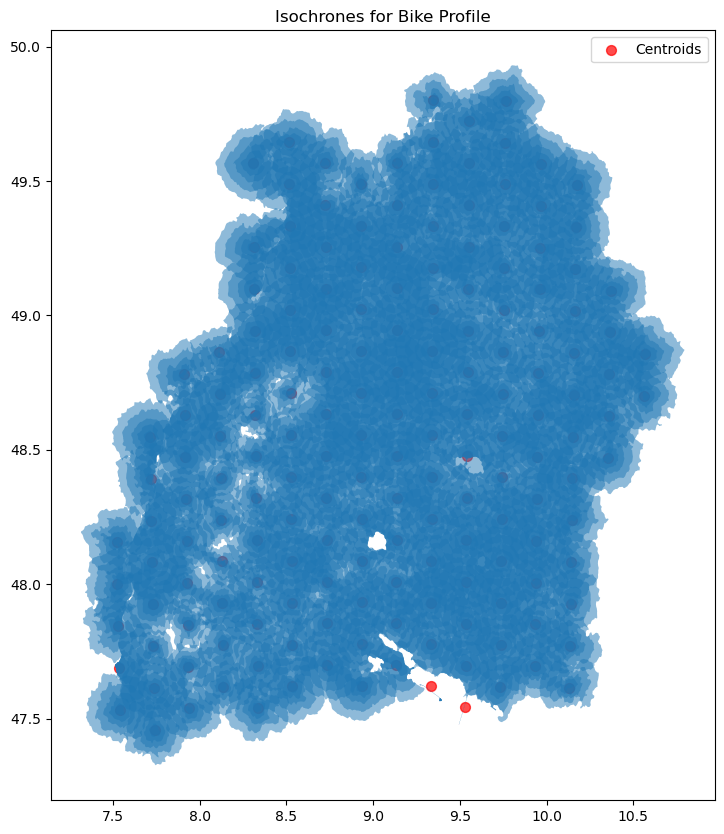

In [64]:
import json
import time
import os
import geopandas as gpd
from openrouteservice import Client
from openrouteservice.exceptions import ApiError
import matplotlib.pyplot as plt

# Load centroids data with GeoPandas
centroids = gpd.read_file('../data/output/centroids_with_coordinates.geojson')

# Change CRS to EPSG:4326
centroids = centroids.to_crs("EPSG:4326")

# Initialize OpenRouteService client
api_key = "5b3ce3597851110001cf6248a4c1622953564835b0073382a3ee7dfa"  # Replace with your actual API key
client = Client(key=api_key)

# Define parameters for isochrone calculation
profile = 'cycling-regular'  # Bike profile
range_type = 'time'
range_seconds = [600, 1200, 1800, 2700, 3600]  # All isochrones with the same time range (10 minutes)

# Directory to save isochrones files
output_directory = '../data/output/isochrones_bike/'

# Create the directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Function to calculate isochrones with retry mechanism
def calculate_isochrones_with_retry(coordinate):
    retries = 3  # Number of retries
    for attempt in range(retries):
        try:
            isochrones = client.isochrones(locations=[coordinate], profile=profile, range_type=range_type, range=range_seconds, attributes=['total_pop'])
            return isochrones
        except ApiError as e:
            if "rate limit exceeded" in str(e):
                print(f"Rate limit exceeded. Retrying in 10 seconds...")
                time.sleep(10)  # Retry after 10 seconds for rate limit errors
            elif "Unable to build an isochrone map" in str(e):
                print(f"Unable to build an isochrone map for centroid. Skipping...")
                return None
            else:
                raise e  # Re-raise the exception if it's not related to rate limit exceeded
    return None

# Iterate over centroids and calculate isochrones
for idx, row in centroids.iterrows():
    # Get coordinates of the centroid
    lon, lat = row['geometry'].x, row['geometry'].y
    coordinate = (lon, lat)

    # Calculate isochrones with retry mechanism
    isochrones = calculate_isochrones_with_retry(coordinate)
    if isochrones is None:
        continue  # Skip the centroid if isochrones cannot be calculated

    # Save isochrones data to file
    output_filename = os.path.join(output_directory, f'isochrones_{row["id"]}.geojson')
    with open(output_filename, 'w') as output_file:
        json.dump(isochrones, output_file)

    print(f"Isochrones calculated for centroid {row['id']}")

    # Rate limit handling
    time.sleep(3)  # Add a small delay to avoid rate limits and respect the rate limit

print("Isochrone calculation for biking completed.")

# Plot centroids and isochrones
fig, ax = plt.subplots(figsize=(10, 10))

# Plot centroids
centroids.plot(ax=ax, color='red', markersize=50, alpha=0.7, label='Centroids')

# Plot isochrones
for idx, row in centroids.iterrows():
    isochrone_file = os.path.join(output_directory, f'isochrones_{row["id"]}.geojson')
    isochrones = gpd.read_file(isochrone_file)
    isochrones.plot(ax=ax, alpha=0.5, linewidth=2)

# Set title and legend
ax.set_title('Isochrones for Bike Profile')
ax.legend()

# Save the plot
plt.savefig('../plots/isochrones_bike_map.png')

# Show plot
plt.show()

## for pedestrian

In [66]:
import json
import time
import os
import geopandas as gpd
from openrouteservice import Client
from openrouteservice.exceptions import ApiError
import matplotlib.pyplot as plt

# Load centroids data with GeoPandas
centroids = gpd.read_file('../data/output/centroids_with_coordinates.geojson')

# Change CRS to EPSG:4326
centroids = centroids.to_crs("EPSG:4326")  # Web Mercator projection

# Initialize OpenRouteService client
api_key = "5b3ce3597851110001cf6248a4c1622953564835b0073382a3ee7dfa"  # Replace with your actual API key
client = Client(key=api_key)

# Define parameters for isochrone calculation
profile = 'foot-walking'  # Walking profile
range_type = 'time'
range_seconds = [600, 1200, 1800, 2700, 3600]  # Desired time ranges in seconds

# Directory to save isochrones files
output_directory = '../data/output/isochrones_walk/'

# Create the directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Function to calculate isochrones with retry mechanism
def calculate_isochrones_with_retry(coordinate):
    retries = 3  # Number of retries
    for attempt in range(retries):
        try:
            isochrones = client.isochrones(locations=[coordinate], profile=profile, range_type=range_type, range=range_seconds, attributes=['total_pop'])
            return isochrones
        except ApiError as e:
            if "rate limit exceeded" in str(e):
                print(f"Rate limit exceeded. Retrying in 10 seconds...")
                time.sleep(10)  # Retry after 10 seconds for rate limit errors
            elif "Unable to build an isochrone map" in str(e):
                print(f"Unable to build an isochrone map for centroid. Skipping...")
                return None
            else:
                raise e  # Re-raise the exception if it's not related to rate limit exceeded
    return None

# Iterate over centroids and calculate isochrones
for idx, row in centroids.iterrows():
    # Get coordinates of the centroid
    lon, lat = row['geometry'].x, row['geometry'].y
    coordinate = (lon, lat)

    # Calculate isochrones with retry mechanism
    isochrones = calculate_isochrones_with_retry(coordinate)
    if isochrones is None:
        continue  # Skip the centroid if isochrones cannot be calculated

    # Save isochrones data to file
    output_filename = os.path.join(output_directory, f'isochrones_{row["id"]}.geojson')
    with open(output_filename, 'w') as output_file:
        json.dump(isochrones, output_file)

    print(f"Isochrones calculated for centroid {row['id']}")

    # Rate limit handling
    time.sleep(3)  # Add a small delay to avoid rate limits and respect the rate limit

print("Isochrone calculation for walking completed.")

# Plot centroids and isochrones
fig, ax = plt.subplots(figsize=(10, 10))

# Plot centroids
centroids.plot(ax=ax, color='blue', markersize=50, alpha=0.7, label='Centroids')

# Plot isochrones
for idx, row in centroids.iterrows():
    isochrone_file = os.path.join(output_directory, f'isochrones_{row["id"]}.geojson')
    isochrones = gpd.read_file(isochrone_file)
    isochrones.plot(ax=ax, alpha=0.5, linewidth=2)

# Set title and legend
ax.set_title('Isochrones for Walking Profile')
ax.legend()

# Save the plot
plt.savefig('../plots/isochrones_walk_map.png')

# Show plot
plt.show()

ApiError: 403 ({'error': 'Access to this API has been disallowed'})

# Clip to grid

## clip nature reserves

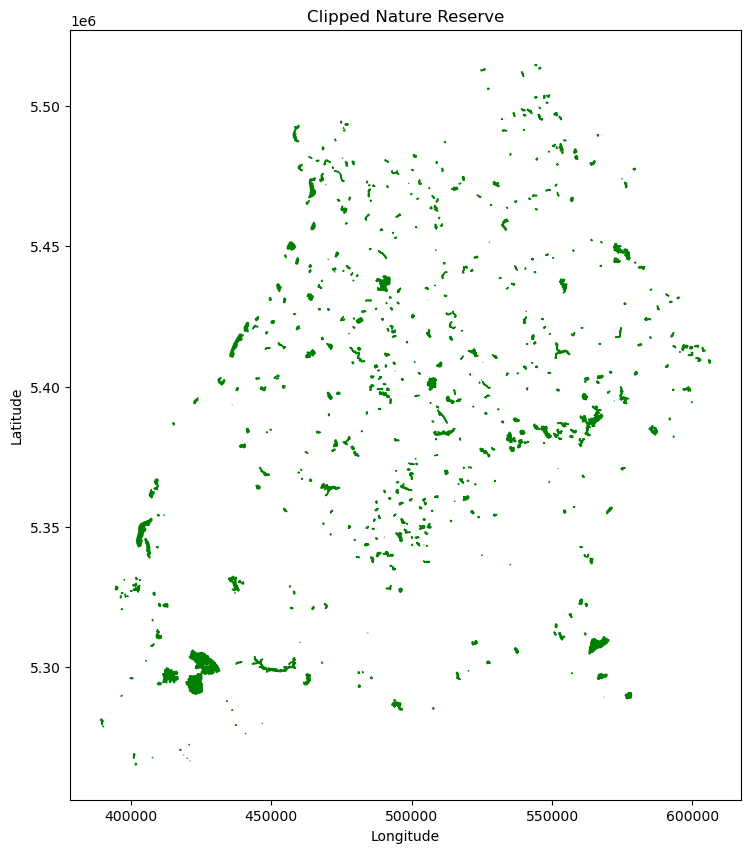

In [67]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import warnings

# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load hexagon grid and nature reserve data
hexagon_grid = gpd.read_file('../data/output/grid.geojson')
nature_reserve = gpd.read_file('../data/output/nature_reserve.geojson')

# Reproject geometries to a UTM CRS
nature_reserve = nature_reserve.to_crs("EPSG:25832")

# Clip nature reserve polygons at the borders of hexagons
clipped_nature_reserve = gpd.overlay(nature_reserve, hexagon_grid, how='intersection', keep_geom_type=False)

# Save the result
clipped_nature_reserve.to_file('../data/output/clipped_nature_reserve.geojson', driver='GeoJSON')

# Read the clipped nature reserve GeoJSON file
clipped_nature_reserve = gpd.read_file('../data/output/clipped_nature_reserve.geojson')

# Plot the clipped nature reserve
fig, ax = plt.subplots(figsize=(10, 10))
clipped_nature_reserve.plot(ax=ax, color='green', edgecolor='green')
ax.set_title('Clipped Nature Reserve')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Save the plot to a file using fig.savefig()
fig.savefig("../plots/clipped_nature_reserves.png", dpi=300, bbox_inches="tight")

### clip protected areas

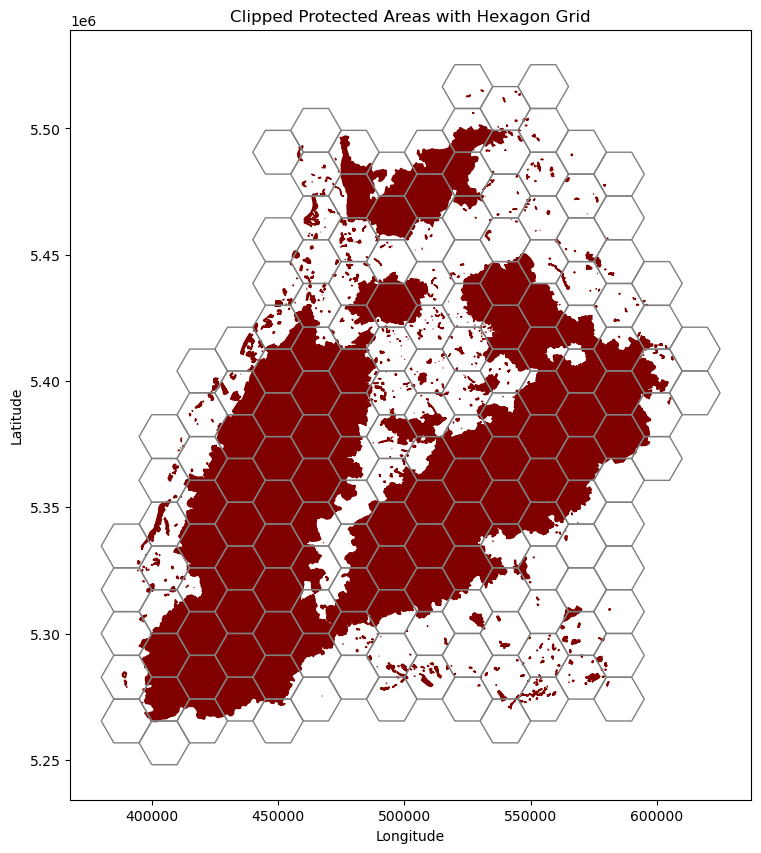

In [71]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import warnings

# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load hexagon grid and protected area
hexagon_grid = gpd.read_file('../data/output/grid.geojson')
protected_area = gpd.read_file('../data/output/protected_area_reclass.geojson')

# Reproject geometries to a UTM CRS
protected_area = protected_area.to_crs("EPSG:25832")

# Clip protectedvarea polygons at the borders of hexagons
clipped_protected_area = gpd.overlay(protected_area, hexagon_grid, how='intersection', keep_geom_type=False)

# Save the result
clipped_protected_area.to_file('../data/output/clipped_protected_area.geojson', driver='GeoJSON')

# Read the clipped protected_area GeoJSON file
clipped_protected_area = gpd.read_file('../data/output/clipped_protected_area.geojson')

# Plot the clipped protected_area and hexagon grid
fig, ax = plt.subplots(figsize=(10, 10))
clipped_protected_area.plot(ax=ax, color='maroon', edgecolor='maroon')
hexagon_grid.plot(ax=ax, facecolor='none', edgecolor='grey')
ax.set_title('Clipped Protected Areas with Hexagon Grid')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Save the plot to a file using fig.savefig()
fig.savefig("../plots/clipped_protected_area_with_grid.png", dpi=300, bbox_inches="tight")